# Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Data Explorations

In [3]:
df= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\combBiodata.csv", sep=';')
df.head(5)

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
2,Adinda Azzahra,NaN,NaN,NaN,"9112,046",Tetap,16,DAK,S1,B3,Jakarta,Pelaksana,3,Pelaksana Utama,4,STAF LV. 3
3,Afrilia Fajarwati,NaN,NaN,NaN,221001,Kontrak,1,DAK,S1,B1-MI,Malang,Pelaksana,2,Pelaksana Pemula,2,STAF LV.0
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR


In [4]:
df.shape

(63, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAMA                  63 non-null     object 
 1   DURATIONS_PERPROJECT  40 non-null     float64
 2   TOTAL_PROJECT         40 non-null     float64
 3   TOTAL_TIME            40 non-null     float64
 4   NIK                   63 non-null     object 
 5   STATUS                63 non-null     object 
 6   LAMA_KERJA            63 non-null     int64  
 7   DIVISI                63 non-null     object 
 8   KUALIFIKASI           63 non-null     object 
 9   GOL                   63 non-null     object 
 10  LOKASI                63 non-null     object 
 11  TIPE KEAHLIAN         63 non-null     object 
 12  KELAS KEAHLIAN        63 non-null     int64  
 13  LEVEL KEAHLIAN        63 non-null     object 
 14  KELAS JABATAN         63 non-null     int64  
 15  JABATAN               63 

# Data Quality Check

In [6]:
df.nunique()

NAMA                    63
DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
NIK                     63
STATUS                   2
LAMA_KERJA              14
DIVISI                   6
KUALIFIKASI              1
GOL                     17
LOKASI                   3
TIPE KEAHLIAN            2
KELAS KEAHLIAN           7
LEVEL KEAHLIAN          13
KELAS JABATAN            7
JABATAN                 10
dtype: int64

In [7]:
df.isnull().sum()

NAMA                     0
DURATIONS_PERPROJECT    23
TOTAL_PROJECT           23
TOTAL_TIME              23
NIK                      0
STATUS                   0
LAMA_KERJA               0
DIVISI                   0
KUALIFIKASI              0
GOL                      0
LOKASI                   0
TIPE KEAHLIAN            0
KELAS KEAHLIAN           0
LEVEL KEAHLIAN           0
KELAS JABATAN            0
JABATAN                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Data Prep

## Null Values & Columns Combination

In [9]:
#since that the data needed is only from PPDB, so we can just drop the non-ppdb (the null values)
df1= df.dropna()
df1.isnull().sum()

NAMA                    0
DURATIONS_PERPROJECT    0
TOTAL_PROJECT           0
TOTAL_TIME              0
NIK                     0
STATUS                  0
LAMA_KERJA              0
DIVISI                  0
KUALIFIKASI             0
GOL                     0
LOKASI                  0
TIPE KEAHLIAN           0
KELAS KEAHLIAN          0
LEVEL KEAHLIAN          0
KELAS JABATAN           0
JABATAN                 0
dtype: int64

In [10]:
df1.nunique()

NAMA                    40
DURATIONS_PERPROJECT    19
TOTAL_PROJECT           22
TOTAL_TIME              39
NIK                     40
STATUS                   2
LAMA_KERJA              12
DIVISI                   6
KUALIFIKASI              1
GOL                     12
LOKASI                   3
TIPE KEAHLIAN            2
KELAS KEAHLIAN           7
LEVEL KEAHLIAN          11
KELAS JABATAN            7
JABATAN                  8
dtype: int64

In [11]:
#combining Kelas Keahlian and Level Keahlian into 1 column
df1['KELAS_KEAHLIAN'] = df1['KELAS KEAHLIAN'].astype(str) + '_ ' + df1['LEVEL KEAHLIAN']
df1=df1.drop(['KELAS KEAHLIAN', 'LEVEL KEAHLIAN'], axis=1)
df1.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\4117283715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KELAS_KEAHLIAN'] = df1['KELAS KEAHLIAN'].astype(str) + '_ ' + df1['LEVEL KEAHLIAN']


,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS JABATAN,JABATAN,KELAS_KEAHLIAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,2,STAF LV. 3,6_ Perekayasa Madya
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,1,MANAGER,2_ Pimpinan Muda
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,7,STAF LV. 3 / ASS. SUPERVISOR,2_ Pimpinan Pemula
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,"8310,019",Tetap,16,DIP,S1,C3,Malang,Perekayasa,5,MANAGER,2_ Pimpinan Muda
6,Ahmad Nashruddin,1066.0,11.0,14329.0,190101,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,5,STAF LV. 3 / ASS. SUPERVISOR,3_ Perekayasa Utama


In [12]:
#combining Kelas Jabatan and Jabatan into 1 column
df1['KELAS_JABATAN'] = df1['KELAS JABATAN'].astype(str) + '_ ' + df1['JABATAN']
df1=df1.drop(['KELAS JABATAN', 'JABATAN', 'NIK'], axis=1)
df1.head()

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS_KEAHLIAN,KELAS_JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6_ Perekayasa Madya,2_ STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,Tetap,16,DSO,S1,C3,Malang,Perekayasa,2_ Pimpinan Muda,1_ MANAGER
4,Afrizal Aditya,29.0,3.0,56.0,Tetap,9,DIP,S1,B3,Malang,Perekayasa,2_ Pimpinan Pemula,7_ STAF LV. 3 / ASS. SUPERVISOR
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,Tetap,16,DIP,S1,C3,Malang,Perekayasa,2_ Pimpinan Muda,5_ MANAGER
6,Ahmad Nashruddin,1066.0,11.0,14329.0,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,3_ Perekayasa Utama,5_ STAF LV. 3 / ASS. SUPERVISOR


## Data Corr & Visualization

<Axes: >

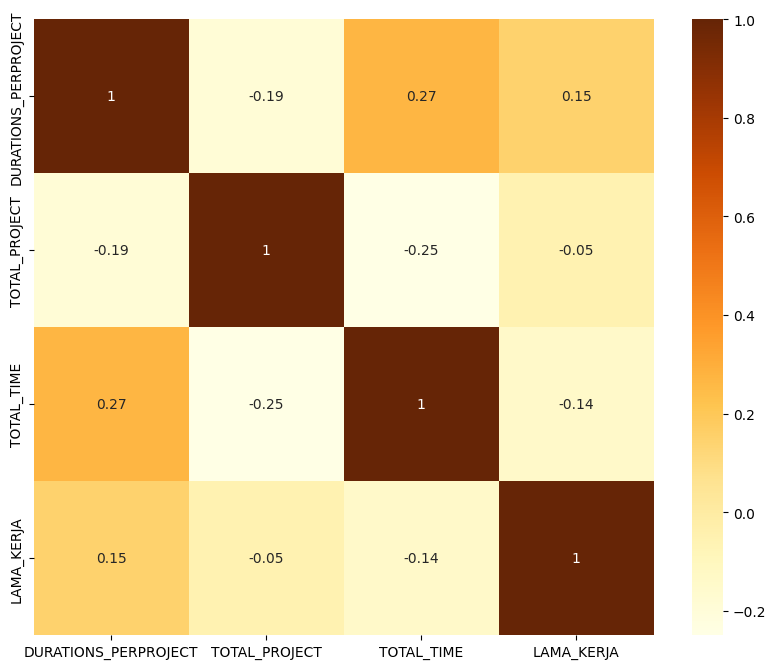

In [13]:
#seperating numerical from categorical data
df1n= df1[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA']]
#correlation on numerical data
correl = df1n.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\3923655740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAMA', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\3923655740.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\3923655740.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIVISI', palette='Set2', data=df1c)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\3923655740.py:12: FutureWarning:

<Axes: xlabel='KELAS_JABATAN', ylabel='count'>

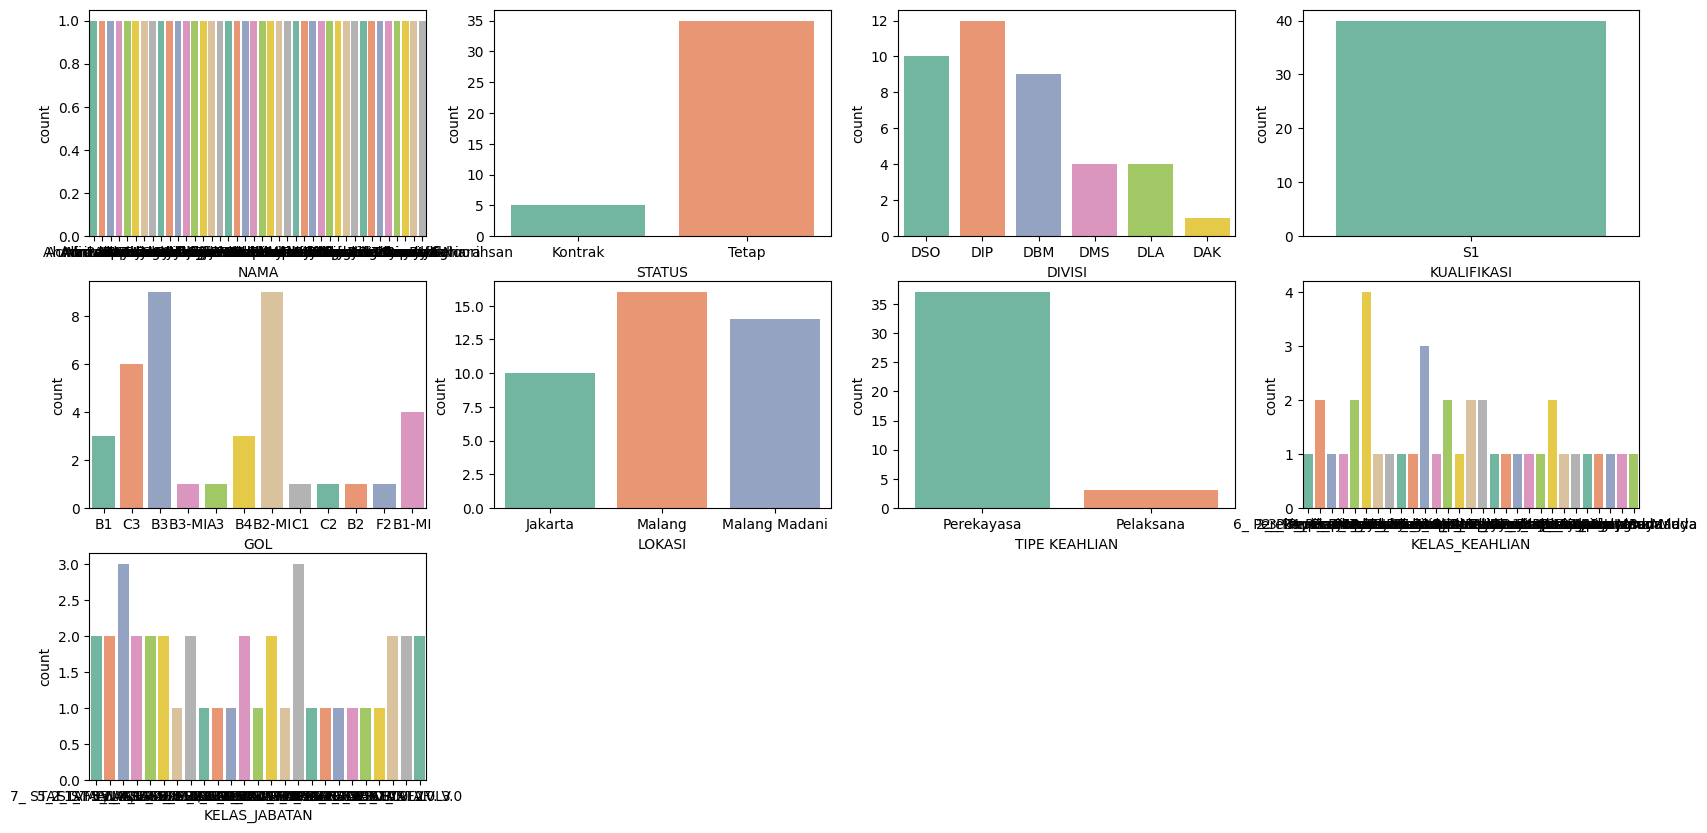

In [14]:
#seperating categorical from numerical data
df1c= df1[['NAMA', 'STATUS', 'DIVISI', 'KUALIFIKASI', 'GOL', 'LOKASI', 'TIPE KEAHLIAN', 'KELAS_KEAHLIAN', 'KELAS_JABATAN']]
#correlation on categorical data
plt.figure(figsize = (20,10))
plt.subplot(3, 4, 1)
sns.countplot(x='NAMA', palette='Set2', data=df1c)
plt.subplot(3, 4, 2)
sns.countplot(x='STATUS', palette='Set2', data=df1c)
plt.subplot(3, 4, 3)
sns.countplot(x='DIVISI', palette='Set2', data=df1c)
plt.subplot(3, 4, 4)
sns.countplot(x='KUALIFIKASI', palette='Set2', data=df1c)
plt.subplot(3, 4, 5)
sns.countplot(x='GOL', palette='Set2', data=df1c)
plt.subplot(3, 4, 6)
sns.countplot(x='LOKASI', palette='Set2', data=df1c)
plt.subplot(3, 4, 7)
sns.countplot(x='TIPE KEAHLIAN', palette='Set2', data=df1c)
plt.subplot(3, 4, 8)
sns.countplot(x='KELAS_KEAHLIAN', palette='Set2', data=df1c)
plt.subplot(3, 4, 9)
sns.countplot(x='KELAS_JABATAN', palette='Set2', data=df1c)

## TIPE KEAHLIAN Atribute

In [15]:
#dropping the other attributes and NAMA
dfa1= df1.drop(['KELAS_KEAHLIAN', 'KELAS_JABATAN', 'NAMA', 'KUALIFIKASI'], axis=1)
dfa1.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,TIPE KEAHLIAN
0,0.0,2.0,2602.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa
1,7.0,6.0,8064.0,Tetap,16,DSO,C3,Malang,Perekayasa
4,29.0,3.0,56.0,Tetap,9,DIP,B3,Malang,Perekayasa
5,0.0,51.0,3734.0,Tetap,16,DIP,C3,Malang,Perekayasa
6,1066.0,11.0,14329.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa


### Feature Selection

In [16]:
#data feature selection
X= dfa1.drop(['TIPE KEAHLIAN'], axis=1)
y= dfa1['TIPE KEAHLIAN']

In [17]:
X.shape

(40, 8)

In [18]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape

(32, 8)

In [20]:
X_test.shape

(8, 8)

### X_train Normalization

In [21]:
X_trainN= X_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA']]
X_trainC= X_train[['STATUS', 'DIVISI', 'GOL', 'LOKASI']]

In [22]:
X_trainN.shape

(32, 4)

In [23]:
X_trainC.shape

(32, 4)

In [24]:
#X_train normalization
scaler = MinMaxScaler()
X_trainN_normalized = scaler.fit_transform(X_trainN)
X_trainN_normalized = pd.DataFrame(X_trainN_normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA'])
X_trainN_normalized = X_trainN_normalized.round(2)
X_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.43,0.21,0.69,0.40
1,0.02,0.00,0.50,0.47
2,0.00,0.40,0.04,0.27
3,0.00,0.02,0.05,0.20
4,0.05,0.00,0.02,1.00


In [25]:
X_trainN_normalized.shape

(32, 4)

### Outliers

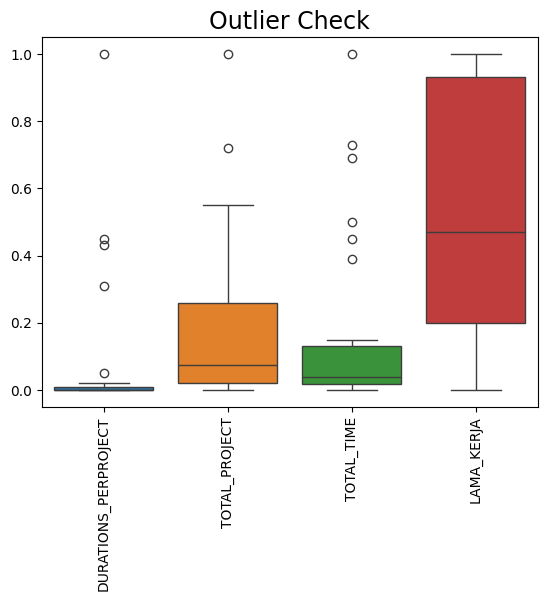

In [26]:
#X_train outliers
sns.boxplot(X_trainN_normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

#### DURATIONS_PERPROJECT

In [27]:
#handling outliers w IQR [DURATIONS]
q1= X_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= X_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.01, 0.01)

In [28]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.004999999999999999, 0.025)

In [29]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['DURATIONS_PERPROJECT'] > upper_limit) | (X_trainN_normalized['DURATIONS_PERPROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.43,0.21,0.69,0.40
4,0.05,0.00,0.02,1.00
6,0.31,0.02,0.13,0.87
22,1.00,0.02,0.45,0.67
28,0.45,0.00,0.05,0.93


In [30]:
#trimming
X_train_nD= X_trainN_normalized.loc[(X_trainN_normalized['DURATIONS_PERPROJECT'] < upper_limit) & (X_trainN_normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_trainN_normalized) - len(X_train_nD))

before removing outliers: 32
after removing outliers: 27
outliers: 5


In [31]:
X_train_nD.shape

(27, 4)

<Axes: ylabel='DURATIONS_PERPROJECT'>

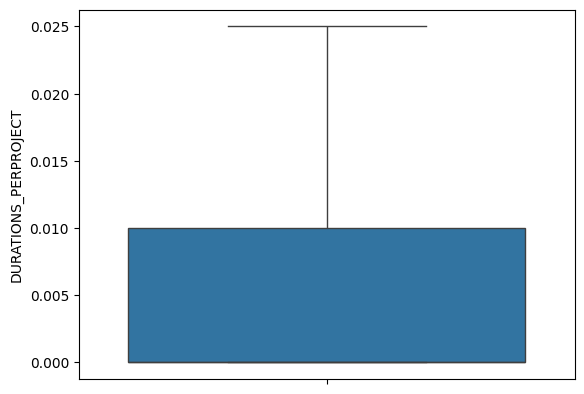

In [32]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_trainN_normalized.copy()
X_train_nD.loc[X_train_nD['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
X_train_nD.loc[X_train_nD['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(X_train_nD['DURATIONS_PERPROJECT'])

In [33]:
X_train_nD.shape

(32, 4)

In [34]:
X_train_nD= X_train_nD.drop(['TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA'], axis=1)
X_train_nD.shape

(32, 1)

In [35]:
X_train_nD.head().round(2)

,DURATIONS_PERPROJECT
0,0.02
1,0.02
2,0.00
3,0.00
4,0.02


#### TOTAL_PROJECT

In [36]:
#handling outliers w IQR [DURATIONS]
q1= X_trainN_normalized['TOTAL_PROJECT'].quantile(0.25)
q3= X_trainN_normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.02, 0.2575, 0.23750000000000002)

In [37]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.09875, 0.61375)

In [38]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_PROJECT'] > upper_limit) | (X_trainN_normalized['TOTAL_PROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
7,0.0,1.00,0.06,0.87
11,0.0,0.72,0.04,0.27


In [39]:
#trimming
X_train_nP= X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_PROJECT'] < upper_limit) & (X_trainN_normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_trainN_normalized) - len(X_train_nP))

before removing outliers: 32
after removing outliers: 32
outliers: 2


<Axes: ylabel='TOTAL_PROJECT'>

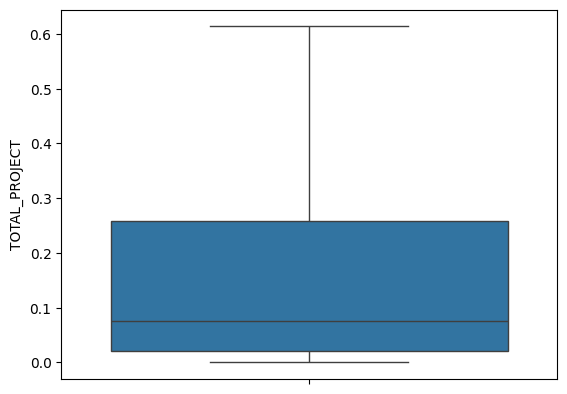

In [40]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_trainN_normalized.copy()
X_train_nP.loc[X_train_nP['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
X_train_nP.loc[X_train_nP['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(X_train_nP['TOTAL_PROJECT'])

In [41]:
X_train_nP.shape

(32, 4)

In [42]:
X_train_nP= X_train_nP.drop(['DURATIONS_PERPROJECT', 'TOTAL_TIME', 'LAMA_KERJA'], axis=1)
X_train_nP.shape

(32, 1)

In [43]:
X_train_nP.head().round(2)

,TOTAL_PROJECT
0,0.21
1,0.00
2,0.40
3,0.02
4,0.00


#### TOTAL_TIME

In [44]:
q1= X_trainN_normalized['TOTAL_TIME'].quantile(0.25)
q3= X_trainN_normalized['TOTAL_TIME'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0175, 0.13, 0.1125)

In [45]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.03875000000000001, 0.29875)

In [46]:
# find the outliers of df
X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_TIME'] > upper_limit) | (X_trainN_normalized['TOTAL_TIME'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.43,0.21,0.69,0.40
1,0.02,0.00,0.50,0.47
9,0.00,0.11,0.39,1.00
21,0.02,0.04,1.00,0.13
22,1.00,0.02,0.45,0.67
27,0.01,0.00,0.73,0.40


In [47]:
#trimming
X_train_nT= X_trainN_normalized.loc[(X_trainN_normalized['TOTAL_TIME'] < upper_limit) & (X_trainN_normalized['TOTAL_TIME'] > lower_limit)]
print('before removing outliers:', len(X_trainN_normalized))
print('after removing outliers:', len(X_train_nT))
print('outliers:', len(X_trainN_normalized) - len(X_train_nT))

before removing outliers: 32
after removing outliers: 26
outliers: 6


<Axes: ylabel='TOTAL_TIME'>

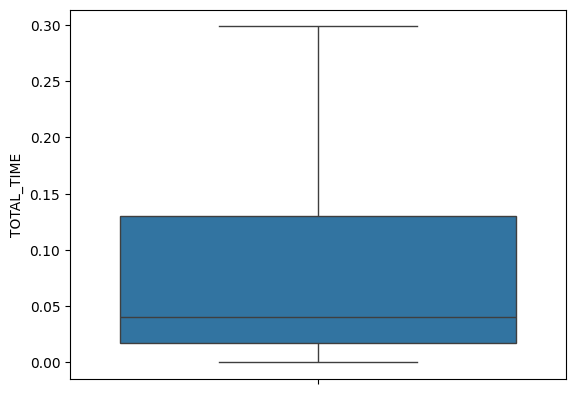

In [48]:
#capping: changing the outlier values to upper/lower limit values
X_train_nT = X_trainN_normalized.copy()
X_train_nT.loc[X_train_nT['TOTAL_TIME'] > upper_limit, 'TOTAL_TIME'] = upper_limit
X_train_nT.loc[X_train_nT['TOTAL_TIME'] < lower_limit, 'TOTAL_TIME'] = lower_limit
sns.boxplot(X_train_nT['TOTAL_TIME'])

In [49]:
X_train_nT.shape

(32, 4)

In [50]:
X_train_nT= X_train_nT.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X_train_nT.shape

(32, 1)

In [51]:
X_train_nT.head().round(2)

,TOTAL_TIME
0,0.30
1,0.30
2,0.04
3,0.05
4,0.02


#### Reunit X_trainN (numerical) data

In [52]:
X_trainN_normalized.shape

(32, 4)

In [53]:
X_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.43,0.21,0.69,0.40
1,0.02,0.00,0.50,0.47
2,0.00,0.40,0.04,0.27
3,0.00,0.02,0.05,0.20
4,0.05,0.00,0.02,1.00


In [54]:
X_trainN_normalized= X_trainN_normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME'], axis=1)

In [55]:
X_trainN_normalized.head()

,LAMA_KERJA
0,0.40
1,0.47
2,0.27
3,0.20
4,1.00


In [56]:
#reuniting them to X_train
X_trainNum = pd.concat([X_train_nD, X_train_nP, X_train_nT, X_trainN_normalized], axis=1)

In [57]:
X_trainNum.shape

(32, 4)

In [58]:
X_trainNum.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA
0,0.025,0.21,0.29875,0.40
1,0.020,0.00,0.29875,0.47
2,0.000,0.40,0.04000,0.27
3,0.000,0.02,0.05000,0.20
4,0.025,0.00,0.02000,1.00


### Encoding

In [59]:
X_trainC.shape

(32, 4)

In [60]:
X_trainC.head()

,STATUS,DIVISI,GOL,LOKASI
6,Tetap,DSO,B3-MI,Malang Madani
20,Tetap,DBM,C2,Jakarta
61,Tetap,DIP,B2-MI,Malang Madani
19,Tetap,DSO,B2-MI,Malang Madani
33,Tetap,DAK,B1,Jakarta


In [61]:
X_trainC.shape

(32, 4)

In [62]:
X_trainCat = pd.get_dummies(X_trainC[['STATUS', 'DIVISI', 'GOL', 'LOKASI']])

In [63]:
X_trainCat.shape

(32, 22)

In [64]:
X_trainCat = X_trainCat.astype(int)

In [65]:
X_trainCat

,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,DIVISI_DSO,GOL_A3,GOL_B1,...,GOL_B2-MI,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
6,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
20,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
61,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
19,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
33,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
36,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
23,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


#### Reunit X_trainC (categorical) data

In [66]:
#checking the indices
print(X_trainNum.index)
print(X_trainCat.index)

RangeIndex(start=0, stop=32, step=1)
Index([ 6, 20, 61, 19, 33, 10, 11, 36, 23,  1, 59, 32,  0,  8, 62, 55,  7,  4,
       41, 52, 34, 39, 27, 54, 25, 14, 26, 15, 24, 12, 40, 37],
      dtype='int64')


In [67]:
#reset indices
X_trainNum = X_trainNum.reset_index(drop=True)
X_trainCat = X_trainCat.reset_index(drop=True)

In [68]:
#concating
X_train2 = pd.concat([X_trainNum, X_trainCat], axis=1)

In [69]:
X_train2.shape

(32, 26)

In [70]:
X_train2

,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,...,GOL_B2-MI,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.025,0.21000,0.29875,0.40,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.020,0.00000,0.29875,0.47,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.000,0.40000,0.04000,0.27,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.000,0.02000,0.05000,0.20,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.025,0.00000,0.02000,1.00,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0.000,0.17000,0.02000,0.93,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
6,0.025,0.02000,0.13000,0.87,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
7,0.000,0.61375,0.06000,0.87,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
8,0.000,0.00000,0.02000,0.33,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.000,0.11000,0.29875,1.00,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Model

#### a. DecisionTreeClassifier

In [75]:
dt = tree.DecisionTreeClassifier(random_state= 100)

In [76]:
dt.fit(X_train2, y_train)

DecisionTreeClassifier(random_state=100)

In [80]:
y_pred = dt.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DIVISI
- GOL
- LOKASI
- STATUS
Feature names seen at fit time, yet now missing:
- DIVISI_DAK
- DIVISI_DBM
- DIVISI_DIP
- DIVISI_DLA
- DIVISI_DMS
- ...
